# Table of Contents
 <p>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
from ipywidgets import widget
from ipywidgets import interact

In [10]:
strahldurchmesser = 2.8 #mm
divergenz = 0.2 #mrad
#scan_distance = 200 #m
scan_resolution = [50. ,25. ,12.5 ,6.3 ,3.1 ,1.6 , 0.8] ## mm @ 10m

_distance = 0
_active_resolution = 0

def get_spotSize_at_distance(distance):
    #Strahldivergenz nach Spotgröße am Objekt umrechnen 
    alpha = divergenz /1000 #rad
    d_m = strahldurchmesser /1000 #m
    r = distance

    # http://handwerkerinfos-bgbau.de/tr/tros_2/anl2.htm
    spot_size_m = d_m + 2 * r * math.tan(alpha/2)
    return spot_size_m
def get_resolution_at_distance(active_resolutio, distance):
    #Auflösung in Winkel umrechnen b/r = beta
    
    beta_rad = scan_resolution[active_resolutio]/1000 / 10.

    resolution_at_scan_distance = distance * beta_rad #m
    return resolution_at_scan_distance
def plot_figure(distance,active_resolution,save=False,save_name='fig_1.pdf'):
    
    spot_size_m = get_spotSize_at_distance(distance)
    resolution_at_scan_distance_m = get_resolution_at_distance(active_resolution,distance)
    
    print ("Ziel-Auflösung: ", resolution_at_scan_distance_m *1000," mm (", scan_resolution[active_resolution]," @10m)")
  
    scan_points = np.arange(1,6)*resolution_at_scan_distance_m
    scan_points_mm = scan_points * 1000
    spot_size_mm =  spot_size_m * 1000
    print ("Spotgröße: ", "%.2f" % spot_size_mm ,'mm')
    
    
    
    plt.figure(1,figsize=(7,7))
    ax = plt.gca()
    ax.set_ylim([np.min(scan_points_mm),np.max(scan_points_mm)])
    ax.set_xlim([np.min(scan_points_mm),np.max(scan_points_mm)])
    #ax.set_ylim([0,1000])
    #ax.set_xlim([0,1000])
    ax.set_xlabel('mm')
    ax.set_ylabel('mm')
    #lt.legend("Spotgröße:")
    text = "Target Resolution: " + str(resolution_at_scan_distance_m *1000) +" mm ("+ str(scan_resolution[active_resolution])+"mm@10m)"
    text += "\nSpotsize: " + "%.2f" % spot_size_mm +' mm'
    text += "\nTarget Distance: "+ str(distance) + ' m'
    plt.text(-0.0,-0.2,text,fontsize=14,transform=ax.transAxes)
    #plt.annotate(text,(100,100),fontsize=14)
    
    for x in scan_points_mm:
        for y in scan_points_mm:
            ax.add_artist(plt.Circle(xy=(x, y), radius=spot_size_mm/2,fill=False,color='r'))    
    
    if save:
        print ('saved')
        
        plt.savefig(save_name, format='pdf',papertype='letter',bbox_inches='tight',pad_inches= 0.2)
    plt.show()
    
   
def change_dist(distance):
    global _distance 
    _distance=  distance
    plot_figure(_distance,_active_resolution)
    
def change_res_mode(resmode):
    global _active_resolution 
    _active_resolution = resmode
   
    plot_figure(_distance,_active_resolution)    
       


Ziel-Auflösung:  21.7  mm ( 3.1  @10m)
Spotgröße:  16.80 mm


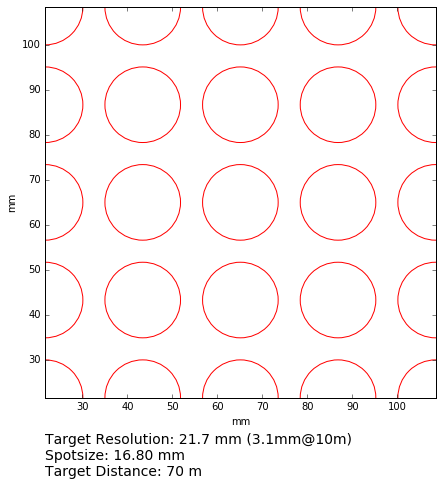

In [11]:
interact(change_dist,distance=(0,100,5),)
interact(change_res_mode,resmode=(0,6,1))
#change_dist(50)
#change_res_mode(3)

Ziel-Auflösung:  9.299999999999999  mm ( 3.1  @10m)
Spotgröße:  8.80 mm
saved


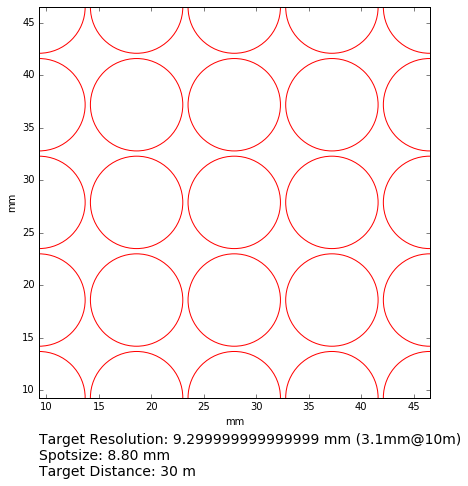

In [13]:
plot_figure(30,4,True,"ResolutionPlot_30m_31.pdf")